In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

current_font_list = matplotlib.rcParams['font.family']

font_path = "C:\Windows\Fonts\malgunbd.ttf"
kfont = matplotlib.font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rcParams['font.family'] = [kfont] + current_font_list

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
pd_data = pd.read_csv(url, header = None)
pd_data.columns = ['구매가', '유지비용', '문갯수', '탑승인원', '수납공간', '안전도', '만족도']
pd_data.head()

,구매가,유지비용,문갯수,탑승인원,수납공간,안전도,만족도
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


      구매가    만족도  안전도
4     low  unacc  258
2     low    acc   89
3     low   good   46
5     low  vgood   39
8     med  unacc  268
6     med    acc  115
7     med   good   23
9     med  vgood   26
1    high  unacc  324
0    high    acc  108
11  vhigh  unacc  360
10  vhigh    acc   72


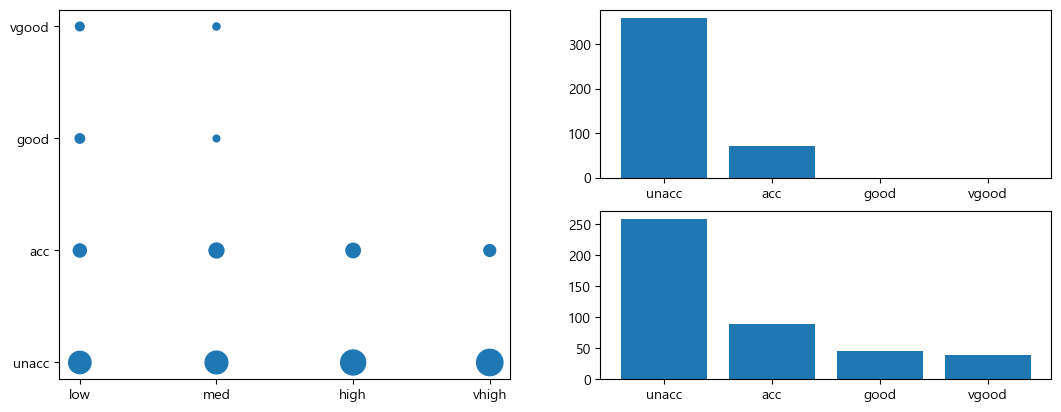

In [52]:
fig = plt.figure(figsize = (6.4 * 2, 4.8))
left = fig.add_subplot(1, 2, 1)
# left.scatter(pd_data['구매가'], pd_data['만족도'], s = 200)

right_top = fig.add_subplot(2, 2, 2)
filter1 = pd_data['구매가'] == 'vhigh'
s1 = pd_data.loc[filter1, '만족도'].value_counts()
s2 = pd.Series(list(s1.values) + [0, 0], index = ['unacc', 'acc', 'good', 'vgood'])
right_top.bar(s2.index, s2)
# print(s2)
# print(s1.values)

right_bot = fig.add_subplot(2, 2, 4)
filter1 = pd_data['구매가'] == 'low'
s1 = pd_data.loc[filter1, '만족도'].value_counts()
right_bot.bar(s1.index, s1)

from pandas.api.types import CategoricalDtype

price_category = CategoricalDtype(categories=["low", "med", "high", "vhigh"], ordered=True)
eval_category = CategoricalDtype(categories=["unacc", "acc", "good", "vgood"], ordered=True)
g1 = pd_data.groupby(['구매가', '만족도'])
s3 = g1['안전도'].count()
s3 = s3.reset_index()
s3['구매가'] = s3['구매가'].astype(price_category)
s3['만족도'] = s3['만족도'].astype(eval_category)
s3.sort_values(['구매가', '만족도'], inplace = True)
print(s3)
left.scatter(s3['구매가'], s3['만족도'], s = s3['안전도'])